In [1]:
from combine_all_nse import combine_csv
out_name = "timeframe_2017_2019"
start_date = "2017-01-01"
end_date = "2019-01-01"
combine_csv(out_name = out_name, start_date = start_date, end_date = end_date)

d:\stock-market-crisis-analysis\combine_all_nse.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df.reset_index(inplace=True)


In [2]:
from preprocessing import preprocess
preprocess(out_name)
cleaned_name = out_name + "_cleaned"

In [3]:
from adjacency_matrix import build_adjaceny_matrix
build_adjaceny_matrix(cleaned_name, threshold=0.9)
adj_path = "adj/" + cleaned_name + ".csv"

In [4]:
from plot_graph import *
G = create_graph_from_adjacency(adj_path)
print("Number of nodes = ", G.number_of_nodes())
print("Number of edges = ", G.number_of_edges())
print("Average degree = ", sum([d for (n, d) in nx.degree(G)]) / float(G.number_of_nodes()))

Number of nodes =  1368
Number of edges =  14679
Average degree =  21.460526315789473


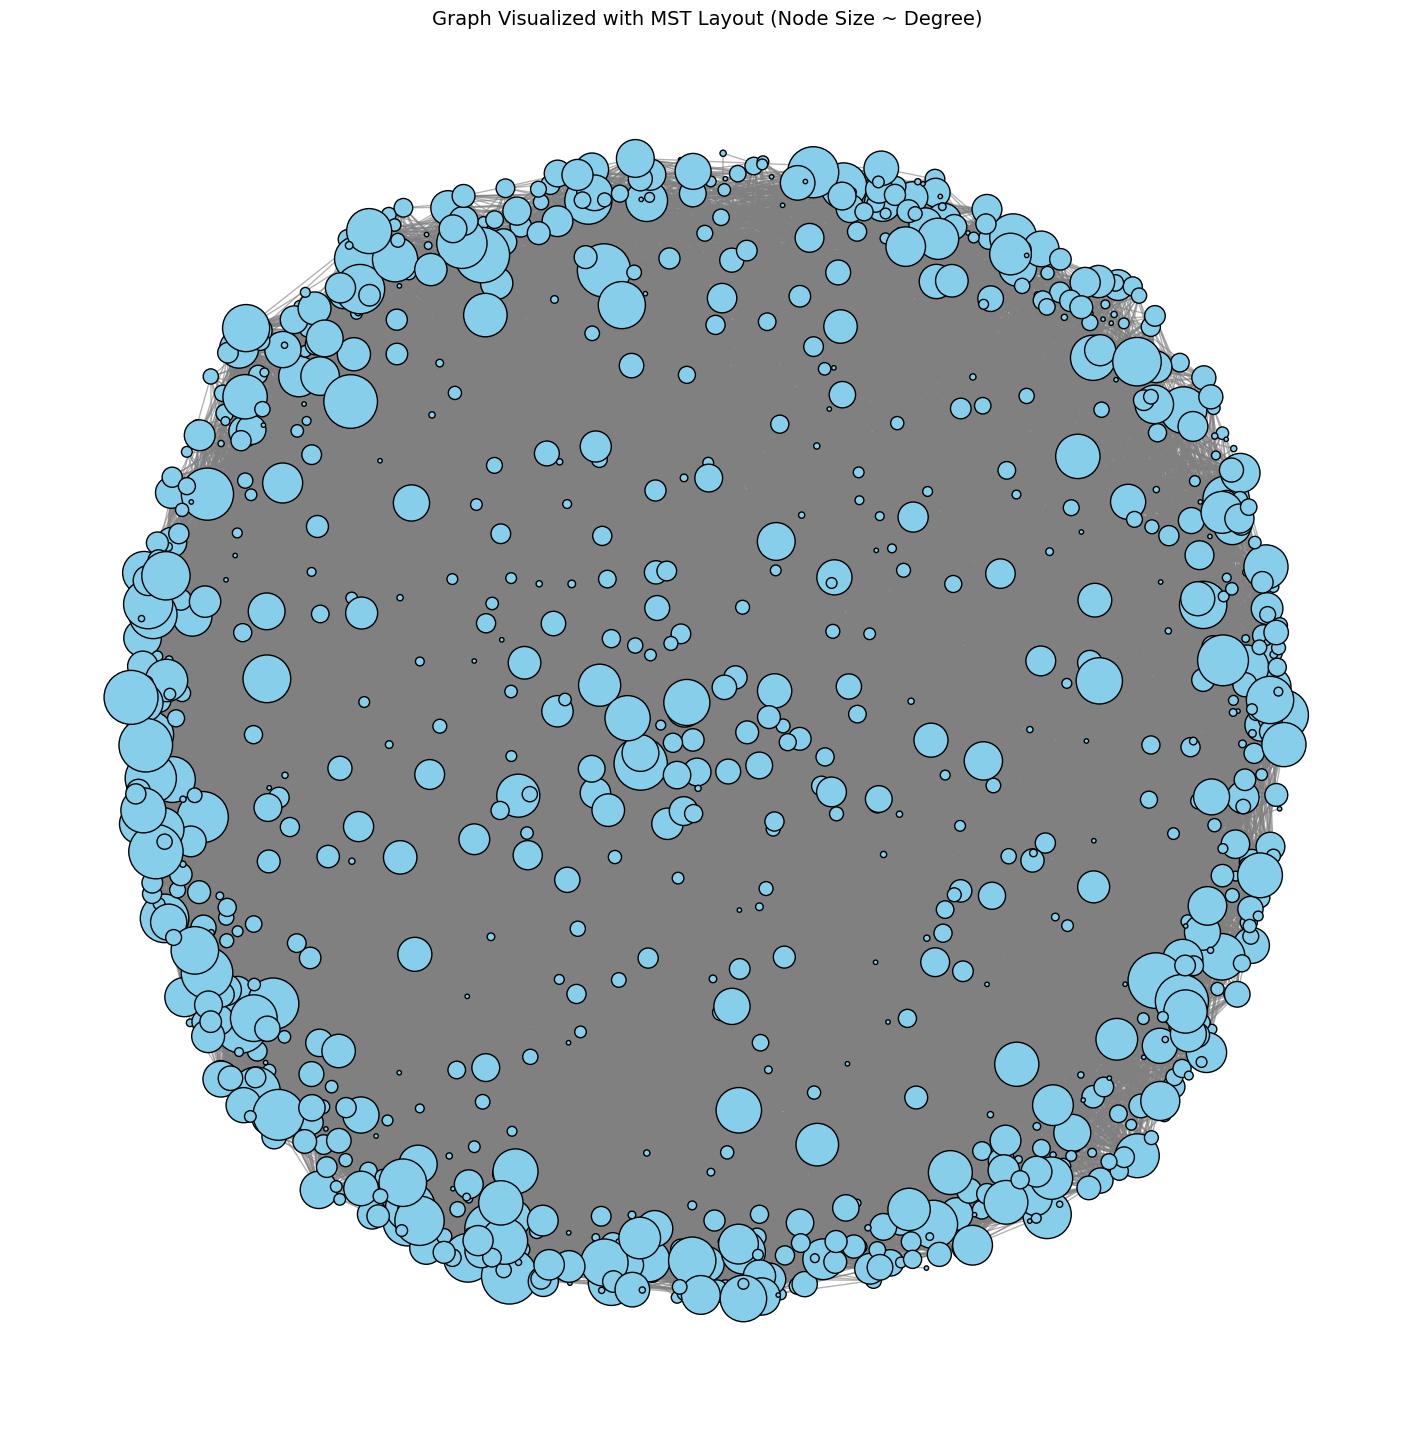

In [6]:
plot_mst_graph(G)

Number of nodes = 1368
Number of edges = 14679
Average degree =  21.460526315789473
kmin =  1
kmax =  161


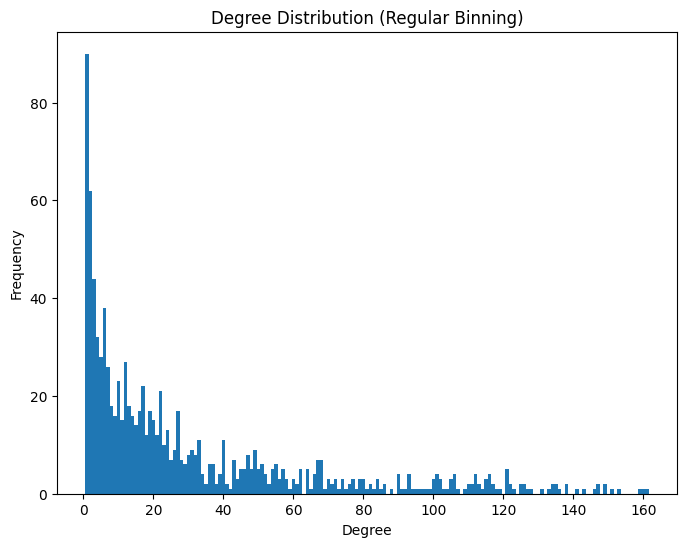

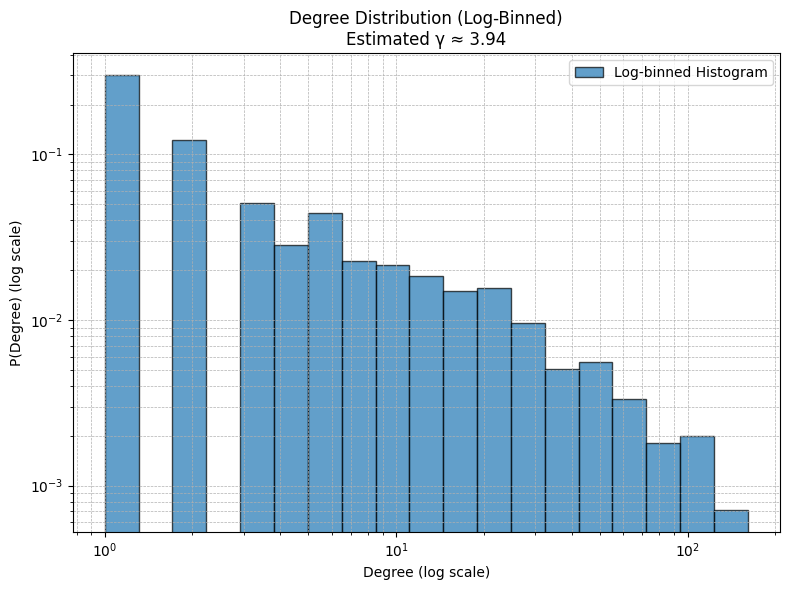

In [7]:
from degree_analysis import plot_degree_dist
plot_degree_dist(G)

In [8]:
from cluster_coeff import *
global_clustering, random_clustering = get_cluster_coeff(G)
print(f"Global Clustering Coefficient (Transitivity): {global_clustering:.4f}")
print(f"Random Graph Clustering Coefficient: {random_clustering:.4f}")

Global Clustering Coefficient (Transitivity): 0.5236
Random Graph Clustering Coefficient: 0.0154



📊 Top 10 Nodes by Degree - Clustering Coefficients:
             Node  Degree  Local Clustering Coef
0         HEADSUP     161               0.453106
1       LYPSAGEMS     160               0.432075
2  IL_AND_FSTRANS     159               0.448452
3      SURYALAXMI     153               0.487444
4         VICEROY     151               0.446711
5             IOB     149               0.467622
6           UNITY     149               0.494830
7        A2ZINFRA     147               0.441618
8         DPSCLTD     147               0.444879
9       SANGAMIND     146               0.432782


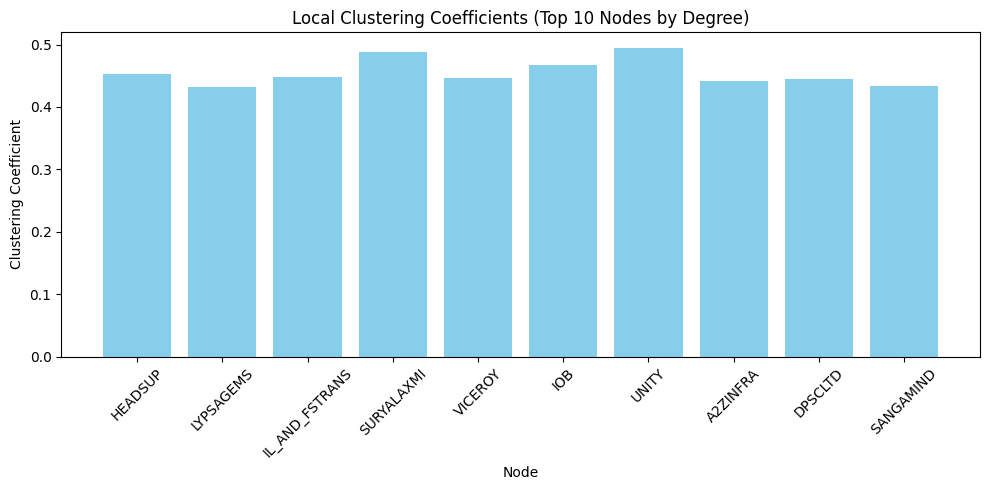

In [9]:
# plotting clustering coefficients of top 10 nodes by degree
plot_cluster_coefficient(G)

In [10]:
from communities import community_detection
partition, modularity, num_communities = community_detection(G)
print(f"Number of communities: {num_communities}")
print(f"Modularity score: {modularity:.4f}")

Number of communities: 407
Modularity score: 0.5035


In [11]:
### OPTIONAL #####
from collections import Counter
community_sizes = Counter(partition.values())
print("Community sizes:")
for community_id, size in community_sizes.items():
    print(f"Community {community_id}: {size} nodes")

Community sizes:
Community 0: 1 nodes
Community 1: 1 nodes
Community 12: 138 nodes
Community 3: 1 nodes
Community 4: 1 nodes
Community 42: 212 nodes
Community 6: 1 nodes
Community 74: 137 nodes
Community 8: 1 nodes
Community 9: 1 nodes
Community 10: 1 nodes
Community 33: 257 nodes
Community 21: 189 nodes
Community 14: 1 nodes
Community 15: 1 nodes
Community 16: 1 nodes
Community 18: 1 nodes
Community 19: 1 nodes
Community 22: 1 nodes
Community 23: 1 nodes
Community 24: 1 nodes
Community 25: 1 nodes
Community 26: 1 nodes
Community 27: 1 nodes
Community 29: 1 nodes
Community 30: 2 nodes
Community 31: 1 nodes
Community 32: 1 nodes
Community 34: 1 nodes
Community 35: 1 nodes
Community 36: 1 nodes
Community 37: 1 nodes
Community 38: 1 nodes
Community 39: 1 nodes
Community 40: 1 nodes
Community 44: 1 nodes
Community 45: 1 nodes
Community 47: 1 nodes
Community 48: 1 nodes
Community 49: 1 nodes
Community 51: 1 nodes
Community 52: 1 nodes
Community 53: 1 nodes
Community 54: 1 nodes
Community 55

In [12]:
from centralities import *
k = 3 # number of nodes to be extracted from the top and bottom of centralities scores
top_nodes = get_top_nodes_by_centrality(G,k)
bottom_nodes = get_bottom_nodes_by_centrality(G,k)

In [13]:
from shockwave import build_graph_from_correlation_csv
corr_path = "adj/" + cleaned_name + ".csv"
G_corr = build_graph_from_correlation_csv(corr_path)

In [14]:
from simulation_shock import *
initial_shock = -0.05
steps = 4
decay = 0.2
simulate_shocks_from_top_central_nodes(G_corr,top_nodes,initial_shock=initial_shock, steps=steps, decay=decay)
simulate_shocks_from_bottom_central_nodes(G_corr,bottom_nodes,initial_shock=initial_shock, steps=steps, decay=decay)


🚨 Simulating shock from top 1 Closeness node: LYPSAGEMS
🔻 Number of stocks that fell: 754
🔺 Stocks that rose: []
📉 Total network shock: -11992.6338

🚨 Simulating shock from top 2 Closeness node: VICEROY
🔻 Number of stocks that fell: 754
🔺 Stocks that rose: []
📉 Total network shock: -11145.8827

🚨 Simulating shock from top 3 Closeness node: SUZLON
🔻 Number of stocks that fell: 754
🔺 Stocks that rose: []
📉 Total network shock: -9538.0342

🚨 Simulating shock from top 1 Betweenness node: SOMANYCERA
🔻 Number of stocks that fell: 699
🔺 Stocks that rose: []
📉 Total network shock: -476.9627

🚨 Simulating shock from top 2 Betweenness node: SABTN
🔻 Number of stocks that fell: 745
🔺 Stocks that rose: []
📉 Total network shock: -1201.5489

🚨 Simulating shock from top 3 Betweenness node: BEL
🔻 Number of stocks that fell: 704
🔺 Stocks that rose: []
📉 Total network shock: -604.6058

🚨 Simulating shock from top 1 Eigenvector node: HEADSUP
🔻 Number of stocks that fell: 739
🔺 Stocks that rose: []
📉 Tota